# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split




### Import data

In [3]:
drive = "D"
date = "20240403"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"D:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"

## Set output file locations

In [5]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [6]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [7]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 308)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date_x', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_drsi_avg_R', 'tot_an_drsi_avg_si', '

In [8]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [9]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,71,nt001.2011,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-963139.00,963139.00,2033821.00,-266174.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,24,barkely01.2011,20111025,135.04,-18.00,0.00,0.00,0.00,0.00,0.00,...,-1995622.00,1995622.00,1967000.00,-635406.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,26,barkely03.2011,20111026,135.29,-18.02,0.00,0.00,0.00,0.00,0.00,...,-1703353.00,1703353.00,2254432.00,-530218.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,27,barkely04.2011,20111026,135.23,-17.98,0.00,0.00,0.00,0.00,0.00,...,-2256318.00,2256318.00,2646032.00,-303355.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,25,barkely02.2011,20111026,135.26,-18.06,0.00,0.00,0.00,0.00,0.00,...,-2041078.00,2041078.00,3188841.00,399323.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,146,site09.2023,20230910,131.02,-13.03,667.18,724.61,2494.07,12832.36,5728.27,...,-1224670.00,1224670.00,3746719.00,448878.00,1597000.00,2492933.00,1458000.00,2828505.00,5336750.00,8135198.00
185,159,site23.2023,20230916,132.54,-12.66,320.02,347.99,1359.66,4423.39,3354.31,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
186,156,site20.2023,20230916,131.56,-12.81,602.67,654.04,2204.47,11815.54,5206.21,...,-1419985.00,1419985.00,3493902.00,377491.00,1642000.00,2420572.00,1453000.00,2733601.00,4887319.00,7064121.00
187,157,site21.2023,20230916,131.57,-12.82,1934.59,2097.90,5741.75,22983.80,12704.86,...,-1072797.00,1072797.00,5216990.00,1735106.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00


## Main only

In [10]:
# main only
#var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Main and veg indicies

In [101]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

## Main, veg indicies and fire

In [102]:
# var_ = "main_veg_indicies_fire"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
#        # 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [103]:
df2

,site_clean,target,b1_wfp_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,nt001.2011,0.00,69.89,102.31,105.91,140.77,110.21,88.67,394.67,10.33,...,5520189.00,42029536.00,963139.00,2033821.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,barkely01.2011,0.00,5.12,101.61,102.74,145.63,106.91,9.88,613.33,4.11,...,4305736.00,37650242.00,1995622.00,1967000.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,barkely03.2011,0.00,17.00,100.92,101.85,145.33,104.51,29.00,675.56,3.44,...,4114821.00,33831663.00,1703353.00,2254432.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,barkely04.2011,0.00,4.00,101.98,103.76,153.62,107.93,2.00,457.78,4.44,...,5200000.00,50120435.00,2256318.00,2646032.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,barkely02.2011,0.00,8.56,100.94,102.91,138.54,106.17,15.33,470.67,8.89,...,5353485.00,49990878.00,2041078.00,3188841.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site09.2023,21703.03,47.44,104.68,109.46,149.93,117.67,70.11,303.56,2.00,...,6158889.00,53810221.00,1224670.00,3746719.00,1597000.00,2492933.00,1458000.00,2828505.00,5336750.00,8135198.00
185,site23.2023,9471.00,16.33,103.50,104.50,179.02,112.07,28.33,441.11,24.44,...,4404715.00,32433582.00,1149782.00,-32626.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
186,site20.2023,19813.34,39.33,103.35,107.11,147.69,112.71,60.33,332.33,2.67,...,5897989.00,51584923.00,1419985.00,3493902.00,1642000.00,2420572.00,1453000.00,2733601.00,4887319.00,7064121.00
187,site21.2023,43331.12,61.78,105.12,112.38,142.76,119.99,82.78,254.44,2.56,...,6827774.00,65796754.00,1072797.00,5216990.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00


In [104]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [105]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [106]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'b1_wfp_mean', 'b1_hsd_mean', 'b1_hmc_mean',
       'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_mean', 'b1_dbifm_dry_mean',
       'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean',
       'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean',
       'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI',
       'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object')


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         189 non-null    object 
 1   target             189 non-null    float64
 2   b1_wfp_mean        186 non-null    float64
 3   b1_hsd_mean        187 non-null    float64
 4   b1_hmc_mean        187 non-null    float64
 5   b1_hcv_mean        187 non-null    float64
 6   b1_h99_mean        187 non-null    float64
 7   b1_ccw_mean        186 non-null    float64
 8   b1_dbifm_dry_mean  182 non-null    float64
 9   b1_dp1fm_dry_mean  178 non-null    float64
 10  b2_dp1fm_dry_mean  178 non-null    float64
 11  b3_dp1fm_dry_mean  178 non-null    float64
 12  b2_dbifm_dry_mean  182 non-null    float64
 13  b3_dbifm_dry_mean  182 non-null    float64
 14  b4_dbifm_dry_mean  182 non-null    float64
 15  b5_dbifm_dry_mean  182 non-null    float64
 16  b6_dbifm_dry_mean  182 non

### Set variables to plot

In [108]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [109]:
value_y

'b1_wfp_mean'

In [110]:
df2.shape

(189, 28)

In [111]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [112]:
save_fig(value_x, value_y)

In [113]:
column_list

Index(['site_clean', 'target', 'b1_wfp_mean', 'b1_hsd_mean', 'b1_hmc_mean',
       'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_mean', 'b1_dbifm_dry_mean',
       'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean',
       'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean',
       'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI',
       'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object')

In [114]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [115]:
print(column_list[3:])
print(column_list[1:2])

['b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']
['target']


### Drop AGB numbers which are high

In [116]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 40000]
df3.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 40000]
drop_sites.value_counts(['site_clean', value_x, value_y])


site_clean   target    dbifmdry_MSR
site21.2023  43331.12  10680466.00     1
dtype: int64

In [117]:
df3

,site_clean,target,b1_wfp_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,nt001.2011,0.00,69.89,102.31,105.91,140.77,110.21,88.67,394.67,10.33,...,5520189.00,42029536.00,963139.00,2033821.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,barkely01.2011,0.00,5.12,101.61,102.74,145.63,106.91,9.88,613.33,4.11,...,4305736.00,37650242.00,1995622.00,1967000.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,barkely03.2011,0.00,17.00,100.92,101.85,145.33,104.51,29.00,675.56,3.44,...,4114821.00,33831663.00,1703353.00,2254432.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,barkely04.2011,0.00,4.00,101.98,103.76,153.62,107.93,2.00,457.78,4.44,...,5200000.00,50120435.00,2256318.00,2646032.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,barkely02.2011,0.00,8.56,100.94,102.91,138.54,106.17,15.33,470.67,8.89,...,5353485.00,49990878.00,2041078.00,3188841.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site13.2023,20381.03,55.33,104.85,109.99,153.39,118.10,77.50,165.75,1.08,...,7033931.00,64220432.00,558252.00,5754584.00,1845000.00,3190393.00,1799000.00,3518712.00,6740352.00,12661933.00
184,site09.2023,21703.03,47.44,104.68,109.46,149.93,117.67,70.11,303.56,2.00,...,6158889.00,53810221.00,1224670.00,3746719.00,1597000.00,2492933.00,1458000.00,2828505.00,5336750.00,8135198.00
185,site23.2023,9471.00,16.33,103.50,104.50,179.02,112.07,28.33,441.11,24.44,...,4404715.00,32433582.00,1149782.00,-32626.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
186,site20.2023,19813.34,39.33,103.35,107.11,147.69,112.71,60.33,332.33,2.67,...,5897989.00,51584923.00,1419985.00,3493902.00,1642000.00,2420572.00,1453000.00,2733601.00,4887319.00,7064121.00


## Choose which data set to run the models from

In [118]:
df_ml = df3

In [119]:
print(list(df_ml.columns))

['site_clean', 'target', 'b1_wfp_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [120]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
print(list(df_ml))

['target', 'b1_wfp_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [122]:
df_ml.shape

(188, 27)

In [123]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 188
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             188 non-null    float64
 1   b1_wfp_mean        185 non-null    float64
 2   b1_hsd_mean        186 non-null    float64
 3   b1_hmc_mean        186 non-null    float64
 4   b1_hcv_mean        186 non-null    float64
 5   b1_h99_mean        186 non-null    float64
 6   b1_ccw_mean        185 non-null    float64
 7   b1_dbifm_dry_mean  181 non-null    float64
 8   b1_dp1fm_dry_mean  177 non-null    float64
 9   b2_dp1fm_dry_mean  177 non-null    float64
 10  b3_dp1fm_dry_mean  177 non-null    float64
 11  b2_dbifm_dry_mean  181 non-null    float64
 12  b3_dbifm_dry_mean  181 non-null    float64
 13  b4_dbifm_dry_mean  181 non-null    float64
 14  b5_dbifm_dry_mean  181 non-null    float64
 15  b6_dbifm_dry_mean  181 non-null    float64
 16  dbifmdry_GSAVI     181 non

In [124]:
df_ml.head(5)

,target,b1_wfp_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,0.00,69.89,102.31,105.91,140.77,110.21,88.67,394.67,10.33,62.56,...,5520189.00,42029536.00,963139.00,2033821.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,0.00,5.12,101.61,102.74,145.63,106.91,9.88,613.33,4.11,2.11,...,4305736.00,37650242.00,1995622.00,1967000.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,0.00,17.00,100.92,101.85,145.33,104.51,29.00,675.56,3.44,4.22,...,4114821.00,33831663.00,1703353.00,2254432.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,0.00,4.00,101.98,103.76,153.62,107.93,2.00,457.78,4.44,3.67,...,5200000.00,50120435.00,2256318.00,2646032.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,0.00,8.56,100.94,102.91,138.54,106.17,15.33,470.67,8.89,0.22,...,5353485.00,49990878.00,2041078.00,3188841.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00


## Reduce level of 0 values

In [125]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [126]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(131, 27)

In [127]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 7 to 188
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             131 non-null    float64
 1   b1_wfp_mean        129 non-null    float64
 2   b1_hsd_mean        129 non-null    float64
 3   b1_hmc_mean        129 non-null    float64
 4   b1_hcv_mean        129 non-null    float64
 5   b1_h99_mean        129 non-null    float64
 6   b1_ccw_mean        129 non-null    float64
 7   b1_dbifm_dry_mean  125 non-null    float64
 8   b1_dp1fm_dry_mean  124 non-null    float64
 9   b2_dp1fm_dry_mean  124 non-null    float64
 10  b3_dp1fm_dry_mean  124 non-null    float64
 11  b2_dbifm_dry_mean  125 non-null    float64
 12  b3_dbifm_dry_mean  125 non-null    float64
 13  b4_dbifm_dry_mean  125 non-null    float64
 14  b5_dbifm_dry_mean  125 non-null    float64
 15  b6_dbifm_dry_mean  125 non-null    float64
 16  dbifmdry_GSAVI     125 non

In [128]:
test = df_ml[df_ml['target']==0.0]

In [129]:
test.shape

(0, 27)

In [130]:
df_ml.dropna(inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 7 to 188
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             120 non-null    float64
 1   b1_wfp_mean        120 non-null    float64
 2   b1_hsd_mean        120 non-null    float64
 3   b1_hmc_mean        120 non-null    float64
 4   b1_hcv_mean        120 non-null    float64
 5   b1_h99_mean        120 non-null    float64
 6   b1_ccw_mean        120 non-null    float64
 7   b1_dbifm_dry_mean  120 non-null    float64
 8   b1_dp1fm_dry_mean  120 non-null    float64
 9   b2_dp1fm_dry_mean  120 non-null    float64
 10  b3_dp1fm_dry_mean  120 non-null    float64
 11  b2_dbifm_dry_mean  120 non-null    float64
 12  b3_dbifm_dry_mean  120 non-null    float64
 13  b4_dbifm_dry_mean  120 non-null    float64
 14  b5_dbifm_dry_mean  120 non-null    float64
 15  b6_dbifm_dry_mean  120 non-null    float64
 16  dbifmdry_GSAVI     120 non

# Scatter plots with error

b1_wfp_mean
b1_wfp_mean
Regression
slope:  0.0016629352247511347
intersept:  13.11888646172348
r2:  0.7271605011797814
P_value:  5.2654622824198764e-21
std error:  0.00014451869095298426


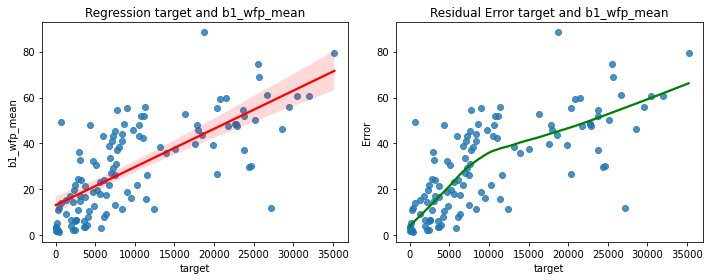

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.544535062722507e-05
intersept:  101.9954502095211
r2:  0.6630385239756592
P_value:  1.5831151105378374e-16
std error:  9.920105531422346e-06


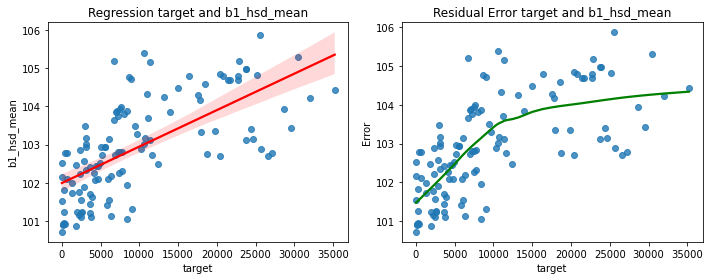

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00022685534750082386
intersept:  103.36942967854132
r2:  0.7025743061296874
P_value:  3.796099860990135e-19
std error:  2.1152321240928843e-05


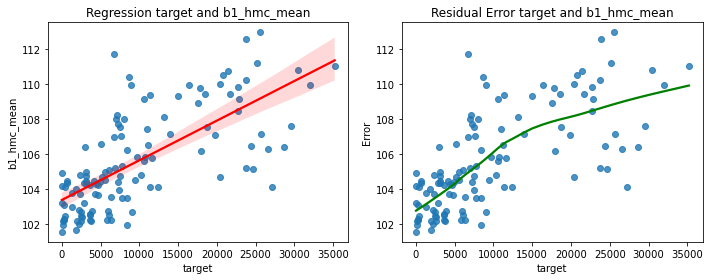

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -1.3629752794363425e-05
intersept:  153.60035804303422
r2:  -0.011929340258525278
P_value:  0.8971074877234269
std error:  0.00010517188189791247


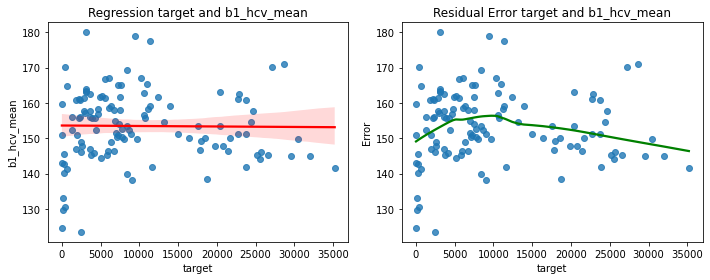

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_h99_mean
b1_h99_mean
Regression
slope:  0.0003582692760847295
intersept:  107.7344522590593
r2:  0.6799989346059342
P_value:  1.3354387964409385e-17
std error:  3.556235766691503e-05


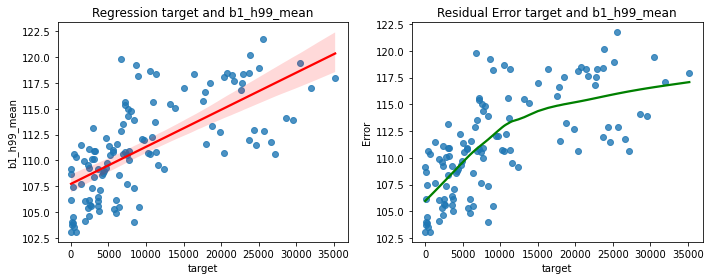

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_ccw_mean
b1_ccw_mean
Regression
slope:  0.002153314425740079
intersept:  22.972133421851105
r2:  0.7123091777646721
P_value:  7.361174118397695e-20
std error:  0.0001953223775802243


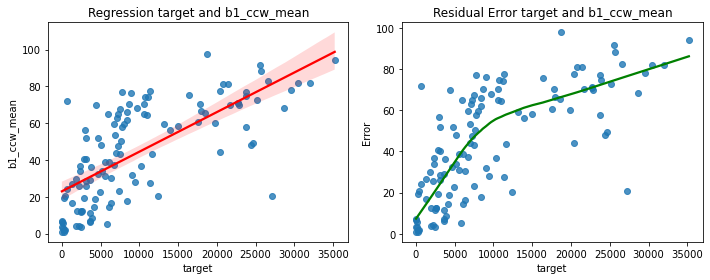

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.009583089640253136
intersept:  487.92530856627525
r2:  -0.6124551777667152
P_value:  1.0590925982041749e-13
std error:  0.0011386625347940018


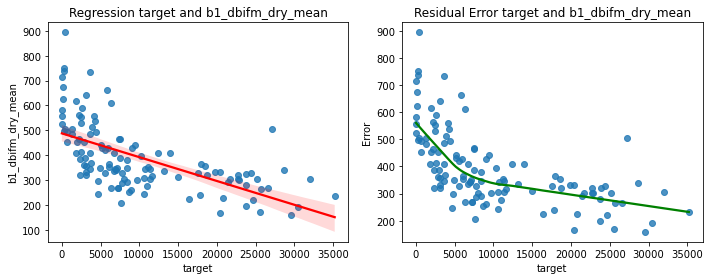

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.0003898417206262108
intersept:  15.399949360903943
r2:  -0.33308203517085466
P_value:  0.00020138971612891613
std error:  0.00010159228955217365


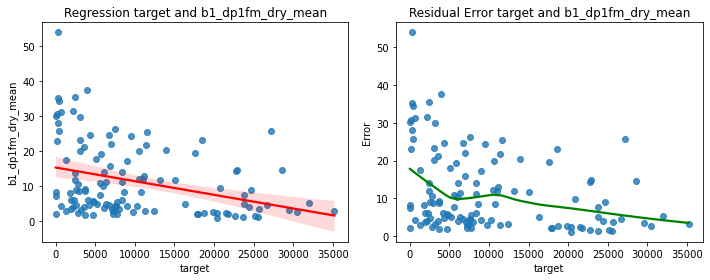

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0013273338137623247
intersept:  16.905711238936966
r2:  0.6941764581584895
P_value:  1.4830084462561624e-18
std error:  0.00012670216954620018


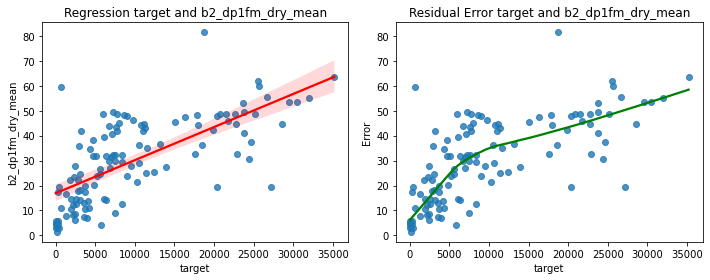

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0009380215688815693
intersept:  66.20519903474082
r2:  -0.5410992691193082
P_value:  1.7654990912532646e-10
std error:  0.00013420526551797667


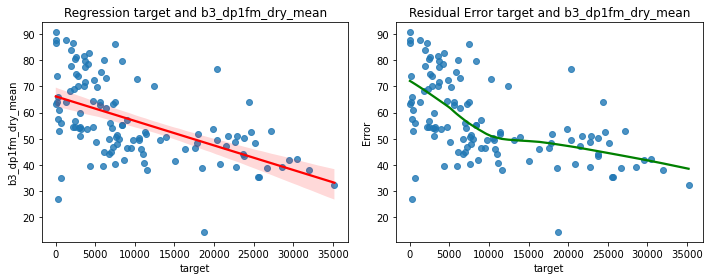

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.015095315151230014
intersept:  803.5796251585449
r2:  -0.631327540389623
P_value:  1.0746132383041843e-14
std error:  0.001707015159668664


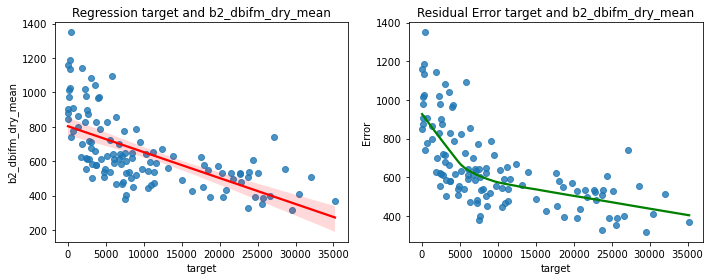

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.025918767121182518
intersept:  1164.0276330940103
r2:  -0.6519185211759134
P_value:  7.35563914864519e-16
std error:  0.0027753309906256227


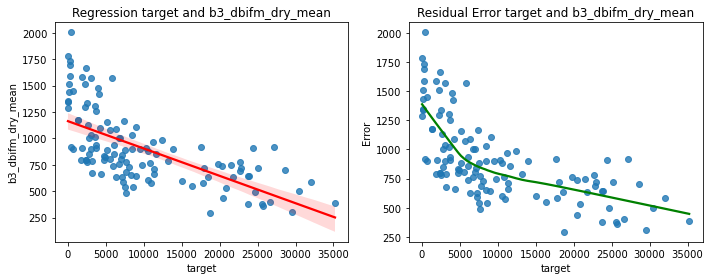

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.0059625856342515595
intersept:  2113.0987351896447
r2:  -0.1546925496519855
P_value:  0.09160222690479022
std error:  0.0035056193578295847


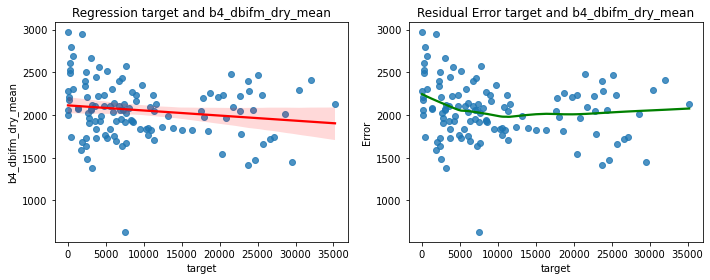

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.040782314038449105
intersept:  2722.3231406226437
r2:  -0.6728830385840827
P_value:  3.8443081548221385e-17
std error:  0.004127390881647397


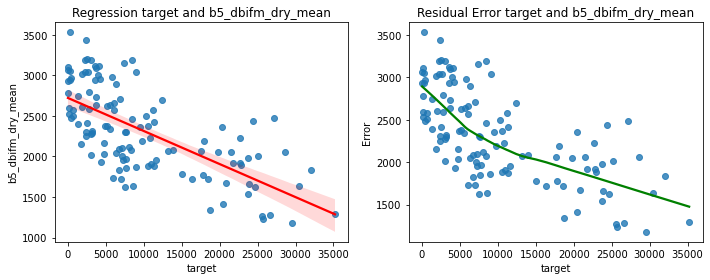

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03753199650528644
intersept:  1855.215333664027
r2:  -0.6491151649475534
P_value:  1.072602491873309e-15
std error:  0.0040489899629582524


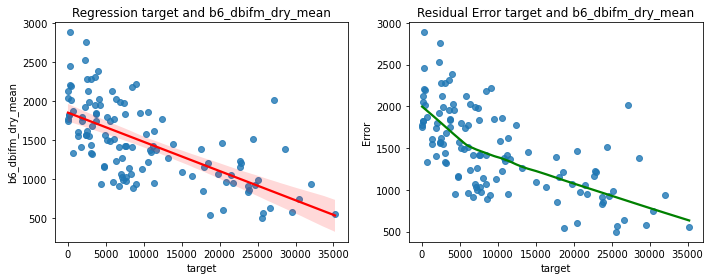

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  25.10600608913055
intersept:  2467911.77613793
r2:  0.44840407279330435
P_value:  2.806603149681341e-07
std error:  4.607045184276087


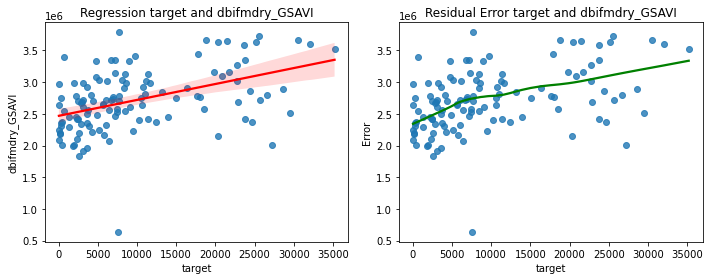

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  72.22411502346036
intersept:  4507694.80505334
r2:  0.6735010191928305
P_value:  3.511110718250636e-17
std error:  7.297210488568086


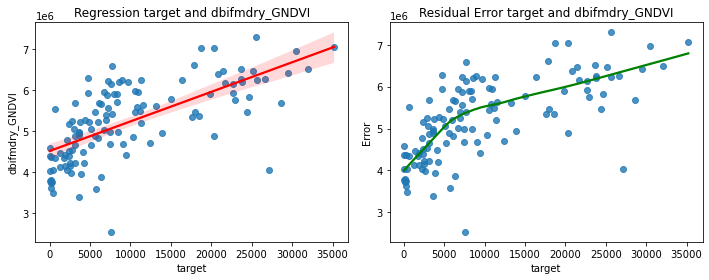

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  605.1424194673921
intersept:  39015911.214586355
r2:  0.5337967346587081
P_value:  3.42996449436392e-10
std error:  88.2494974303931


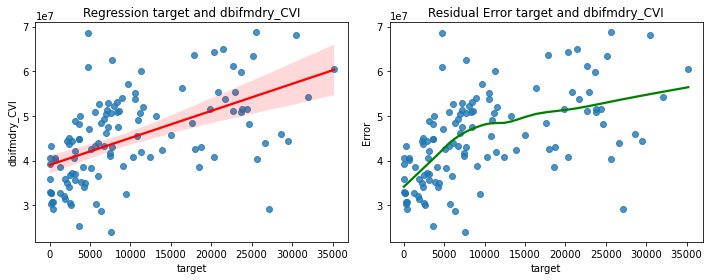

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -36.36855786986127
intersept:  1854766.3052180912
r2:  -0.5264010710494591
P_value:  6.613952863251614e-10
std error:  5.407642830381434


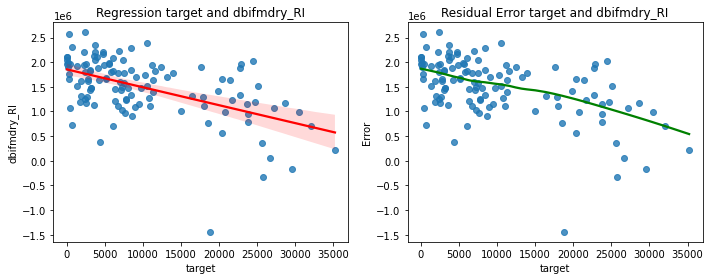

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  120.78948035355558
intersept:  582855.8893176869
r2:  0.5753270543343494
P_value:  6.283821382933121e-12
std error:  15.808329350744271


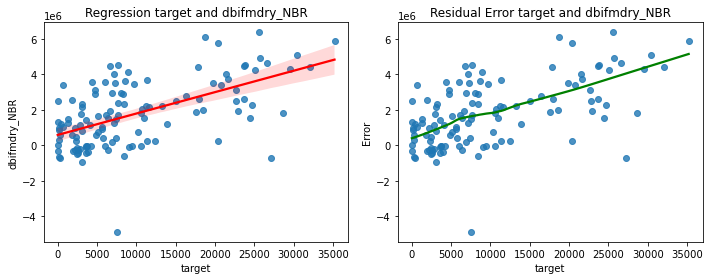

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  9.129787199714444
intersept:  1309566.556137736
r2:  0.28650463541314425
P_value:  0.0015116861714051372
std error:  2.8105366571999717


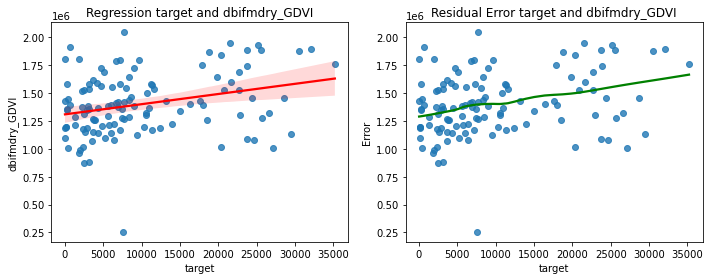

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  41.48929211293221
intersept:  1486791.6456745842
r2:  0.6050883179658951
P_value:  2.483923406846742e-13
std error:  5.025458724905115


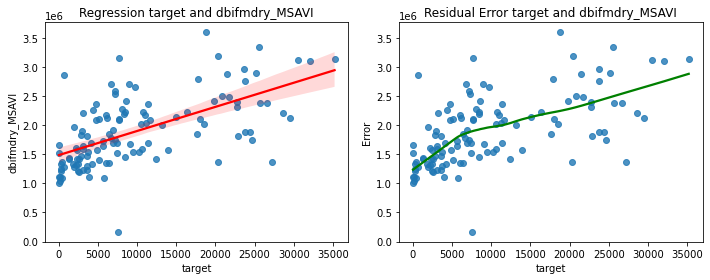

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  19.95820243483249
intersept:  949095.0628120239
r2:  0.5329556566606252
P_value:  3.698866740489275e-10
std error:  2.9169782978206658


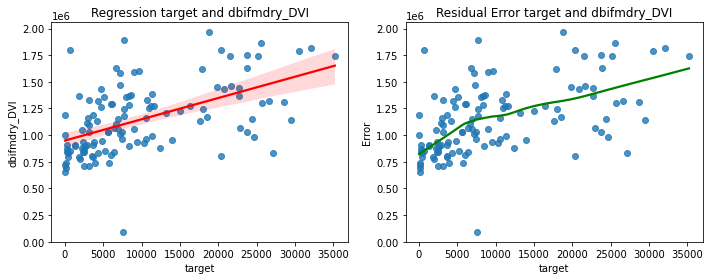

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  46.05611297195423
intersept:  1716555.8553926423
r2:  0.623974418102159
P_value:  2.6693483205652064e-14
std error:  5.30979533015078


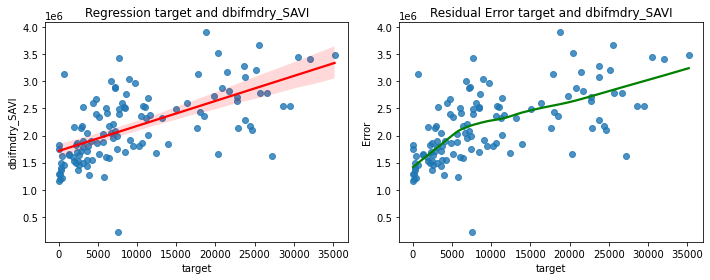

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  110.0622161665137
intersept:  2923971.5929209273
r2:  0.7108852762876404
P_value:  9.396801728552669e-20
std error:  10.024051276100627


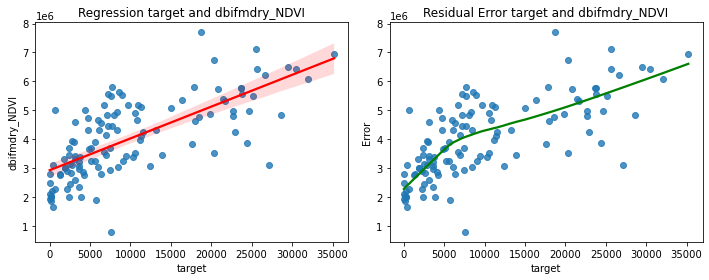

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826


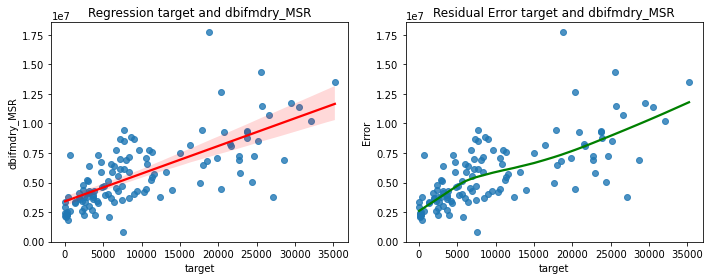

--------------------------------------------------
Residuals
slope:  234.47043776454814
intersept:  3407518.1682175845
r2:  0.7117509086137563
P_value:  8.102067055594345e-20
std error:  21.30214406289826


In [132]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

### Split off unseen data

In [133]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [134]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(67, 26) (67,)
(29, 26) (29,)


### Plot up Histograms for train and test datasets

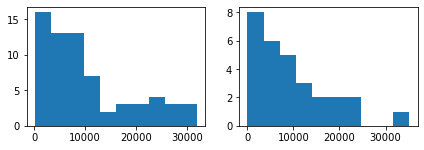

In [135]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [136]:
print(xdata1)

     b1_wfp_mean  b1_hsd_mean  b1_hmc_mean  b1_hcv_mean  b1_h99_mean  \
18          9.44       101.99       103.79       152.24       107.69   
19          6.83       101.22       102.20       148.91       105.71   
20         17.25       102.46       104.03       160.75       109.94   
21         19.92       102.23       103.70       155.95       109.24   
22          6.58       101.25       102.39       147.84       105.64   
..           ...          ...          ...          ...          ...   
183        55.33       104.85       109.99       153.39       118.10   
184        47.44       104.68       109.46       149.93       117.67   
185        16.33       103.50       104.50       179.02       112.07   
186        39.33       103.35       107.11       147.69       112.71   
188        50.25       104.82       111.21       145.12       118.99   

     b1_ccw_mean  b1_dbifm_dry_mean  b1_dp1fm_dry_mean  b2_dp1fm_dry_mean  \
18         16.78             484.56              17.56    

In [137]:
print(ydata)

[1.2936000e+03 2.5408459e+03 1.7966666e+03 2.3572266e+03 2.6087600e+03
 1.9209960e+03 2.8332131e+03 2.1469141e+04 1.1180400e+04 2.2699391e+04
 4.8727769e+03 5.5881421e+03 8.0314502e+03 3.1569021e+03 7.6585425e+03
 3.1231201e+03 1.7994760e+04 7.7112935e+03 3.9154500e+03 4.3709121e+03
 3.5199711e+04 2.2152900e+03 6.8991998e+02 7.2031958e+03 3.6158325e+03
 6.0447378e+03 5.6064385e+03 8.3762158e+03 2.9521801e+04 2.8320320e+03
 6.0060000e+03 6.3602002e+03 5.1737070e+03 2.4740100e+03 2.3737561e+04
 9.0309453e+03 2.5701689e+04 1.1338128e+04 2.6636295e+04 8.4137900e+03
 1.2432934e+04 2.0359826e+04 1.0273340e+04 7.4328101e+03 7.2401177e+03
 2.4024001e+02 1.8480000e+01 1.6632001e+02 4.0656000e+02 1.2936000e+02
 5.5439999e+01 1.1596200e+04 2.2176001e+03 7.7153999e+03 4.7239990e+03
 3.6483931e+03 4.7171880e+03 9.7089648e+03 1.3490400e+03 3.0861599e+03
 3.6036001e+03 2.4393601e+03 6.3756001e+03 6.9467827e+03 7.1505176e+03
 7.4785898e+03 1.0763322e+04 5.7780801e+03 4.1420864e+03 6.7264146e+03
 1.054

In [143]:
# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=42)

# Define Random Forest classifier
rf = rfr()

# Define parameter grid
param_grid = {
    #'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
    #'max_depth': [None, 2], #, 3, 4, 5, 10, 20],
    #'min_samples_split': [1, 2, 3, 4, 5, 10],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Evaluate model performance
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test accuracy: 0.1282575738195484


C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In [ ]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [ ]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_rf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_Band_Importance_Score.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
df_band.info()

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
df_var = dfsort[dfsort['n'] > 0.01]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
column_var

In [ ]:
model_data

In [ ]:
select_df = model_data[column_var]

In [ ]:
df_corr = select_df.corr()
df_corr

In [ ]:
dfsort.to_csv(os.path.join(output_, "{0}_rf_variable_score.csv".format(var_)))
df_corr.to_csv(os.path.join(output_, "{0}_rf_select_variable_corrolation.csv".format(var_)))

In [ ]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_variable_score.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
select_df

# Rerun on Selected data

In [ ]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
select_df

## Re-train model on selected paramiters

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_selectedrf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_selected_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv(csv_file, header=0)
df.shape 

In [ ]:
c_list = df.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['bio_agb_kg1ha'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')

ydata1 = df1[['bio_agb_kg1ha']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()